# Movie Recommendation System
### By Prerna Kapoor

# Introduction
Recommendation systems plays an important role in e-commerce and online streaming services, such as Netflix, YouTube, Amazon, etc. Making the right recommendation for the next product/service, music or movie increases user retention and satisfaction, leading to product/service sales, thus increasing profit growth. Companies competing for customer loyalty invest on recommendation systems that capture and analyze the user’s preferences, and offer products/services with higher likelihood of purchase. In this project, our aim is to develop a movie recommendation system.

# Problem Definition
We want to build a movie recommendation system using clustering models. Given a list of movies, we aim to create a new list of movies using clustering models. Because we don't have user-specific information, we have to make recommendations based on content, genre, language, popularity, actors, revenue, cast etc. In order to discover the relationships between movies we will make an exploratory data analysis. We will use our analysis to build and improve our models. For example, some keywords in the description of a movie or genre can be a significant parameter when recommending movies. We will analyse our data to find these sort of relationships between movies.

We have two questions that we want to answer in our work:

1. How are movies related by their numerical attributes? (e.g. budget, revenue and popularity)
2. How are movies related by their non-numerical attributes? (e.g. genre,cast,crew)

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import ast

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
import timeit


import warnings
warnings.filterwarnings('ignore')

## Dataset
MovieLens dataset is used for movie recommendation system.
Dataset Link: https://grouplens.org/datasets/movielens/latest/.
The data consist of all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.

In [3]:
dataset_credits = pd.read_csv("C:\\Users\\prern\\Downloads\\movies\\credits.csv")
dataset_movies = pd.read_csv("C:\\Users\\prern\\Downloads\\movies\\movies_metadata.csv")

In [4]:
df_credits = dataset_credits.copy(deep=True)
df_movies = dataset_movies.copy(deep=True)

In [5]:
df_credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [6]:
#Joining movies and credits dataset
df_credits = df_credits.drop(columns=["id"], axis=1)
df_movies = pd.concat([df_movies, df_credits], axis = 1)

In [7]:
df_movies.shape

(45476, 26)

In [8]:
df_movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [9]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

### Data Dictionary
1. **adult**: Indicates if the movie is X-Rated or Adult.
2. **belongs_to_collection**: A stringified dictionary that gives information on the movie series the particular film belongs to.
3. **budget**: The budget of the movie in dollars.
4. **genres**: A stringified list of dictionaries that list out all the genres associated with the movie.
5. **homepage**: The Official Homepage of the movie.
6. **id**: The ID of the move.
7. **imdb_id**: The IMDB ID of the movie.
8. **original_language**: The language in which the movie was originally shot in.
9. **original_title**: The original title of the movie.
10. **overview**: A brief blurb of the movie.
11. **popularity**: The Popularity Score assigned by TMDB.
12. **poster_path**: The URL of the poster image.
13. **production_companies**: A stringified list of production companies involved with the making of the movie.
14. **production_countries**: A stringified list of countries where the movie was shot/produced in.
15. **release_date**: Theatrical Release Date of the movie.
16. **revenue**: The total revenue of the movie in dollars.
17. **runtime**: The runtime of the movie in minutes.
18. **spoken_languages**: A stringified list of spoken languages in the film.
19. **status**: The status of the movie (Released, To Be Released, Announced, etc.)
20. **tagline**: The tagline of the movie.
21. **title**: The Official Title of the movie.
22. **video**: Indicates if there is a video present of the movie with TMDB.
23. **vote_average**: The average rating of the movie.
24. **vote_count**: The number of votes by users, as counted by TMDB.
25. **cast**: Cast information.
26. **crew**: Crew Information.

# Data Cleaning

The dataset consist of 45466 movie entries and 26 features in which 4 are numeric and 22 are string. Fearure like budget, popularity are converted to numeric.
The following features are not of importance for the aim of our project. Therefore they will be dropped from the dataset:
- adult
- belongs_to_collection
- homepage
- tagline
- poster_path
- overview
- imdb_id
- spoken_languages
- production_countries
- original_language
- original_title
- video

In [10]:
df_movies["status"].value_counts()

Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

In [11]:
# Droping movies having status other than Released
df_movies = df_movies.drop(df_movies[df_movies['status'] == "Rumored"].index, axis=0)
df_movies = df_movies.drop(df_movies[df_movies["status"] == "Post Production"].index, axis=0)
df_movies = df_movies.drop(df_movies[df_movies['status'] == "Planned"].index, axis=0)
df_movies = df_movies.drop(df_movies[df_movies["status"] == "In Production"].index, axis=0)
df_movies = df_movies.drop(df_movies[df_movies['status'] == "Canceled"].index, axis=0)

df_movies = df_movies.drop(columns=["status", "homepage", "adult", "original_title", 
                                    "overview", "spoken_languages", "video",
                                    "tagline", "production_countries", "original_language","belongs_to_collection", "poster_path", "imdb_id"], axis=1)

In [12]:
# Droping string values from budget variable
df_movies.drop(df_movies[df_movies['budget'] =='/ff9qCepilowshEtG2GYWwzt2bs4.jpg'].index, inplace = True)
df_movies.drop(df_movies[df_movies['budget'] =='/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg'].index, inplace = True)
df_movies.drop(df_movies[df_movies['budget'] =='/zaSf5OG7V8X8gqFvly88zDdRm46.jpg'].index, inplace = True)

In [13]:
df_movies["budget"] = pd.to_numeric(df_movies["budget"], downcast="float")
df_movies["popularity"] = pd.to_numeric(df_movies["popularity"], downcast="float")

In [14]:
df_movies.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,45098.0,45095.000000,4.509500e+04,44840.000000,45095.000000,45095.000000
mean,4257293.5,2.934165,1.129857e+07,94.231111,5.620812,110.697705
std,17482980.0,6.019176,6.458421e+07,38.383936,1.920040,493.206768
min,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.0,0.388256,0.000000e+00,85.000000,5.000000,3.000000
50%,0.0,1.133398,0.000000e+00,95.000000,6.000000,10.000000
75%,0.0,3.721883,0.000000e+00,107.000000,6.800000,35.000000
max,380000000.0,547.488281,2.787965e+09,1256.000000,10.000000,14075.000000


## Distributions
Now, we will take a look at the distributions of various features.

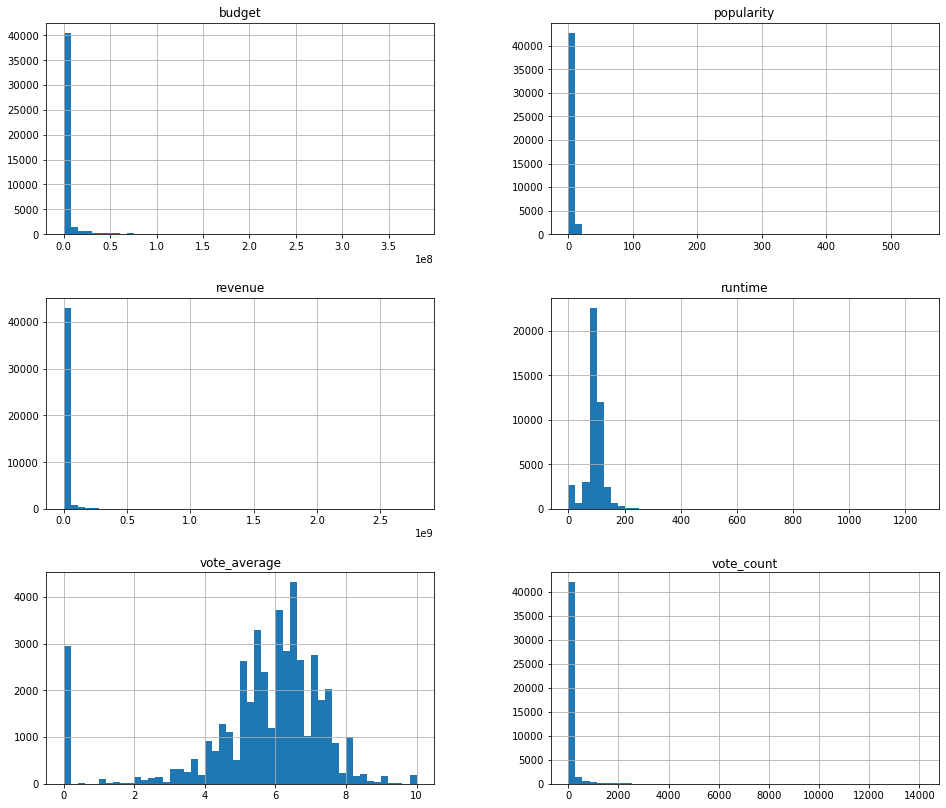

In [15]:
df_movies.hist(bins = 50, figsize = (16, 14), ) #this method shows the histograms for each numerical attribute
plt.show()

It looks like most of the numerical features are highly skewed, which is highly expected as there are some blockbuster movies that dominate the movie industry. Vote average is slightly skewed to left in contrast with most of the features.

In [16]:
sum(df_movies.duplicated())

5

In [17]:
df_movies=df_movies.drop_duplicates()

## Handling Missing values

In [19]:
df_movies.isna().sum()

budget                   10
genres                   10
id                       10
popularity               13
production_companies     13
release_date             92
revenue                  13
runtime                 268
title                    13
vote_average             13
vote_count               13
cast                      0
crew                      0
dtype: int64

In [20]:
df_movies = df_movies.dropna(axis = 0)

Processing categorical variables:

- genres
- production companies
- cast
- crew

## Data Exploration

In [21]:
df_movies["genres"][1]

"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]"

In [23]:
genre_list = ['Adventure', 'Science Fiction', 'Fantasy', 'Crime',
              'Western', 'Family', 'Animation','War',
              'Mystery','Romance','TV Movie','Action', 'Thriller',
              'Comedy','Drama' , 'History', 'Music', 'Horror', 'Documentary', 'Foreign']

def assign_genre(genres):
  if (element in genres):
    return True
  else:
    return False


for element in genre_list:
  df_movies[element] = df_movies["genres"].apply(assign_genre)

df_movies.head(2)

,budget,genres,id,popularity,production_companies,release_date,revenue,runtime,title,vote_average,...,TV Movie,Action,Thriller,Comedy,Drama,History,Music,Horror,Documentary,Foreign
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,81.0,Toy Story,7.7,...,False,False,False,True,False,False,False,False,False,False
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,262797249.0,104.0,Jumanji,6.9,...,False,False,False,False,False,False,False,False,False,False


In [24]:
# Converting release_date variable to datetime object.
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])
df_movies['year'] = df_movies['release_date'].dt.year
df_movies = df_movies.drop("release_date", axis = 1)

Extracting the first three actors or actresses that appear in the cast column.

In [25]:
df_movies['cast'][1]

"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a36847f80a7c73', 'gender': 2, 'id': 2157, 'name': 'Robin Williams', 'order': 0, 'profile_path': '/sojtJyIV3lkUeThD7A2oHNm8183.jpg'}, {'cast_id': 8, 'character': 'Samuel Alan Parrish / Van Pelt', 'credit_id': '52fe44bfc3a36847f80a7c99', 'gender': 2, 'id': 8537, 'name': 'Jonathan Hyde', 'order': 1, 'profile_path': '/7il5D76vx6QVRVlpVvBPEC40MBi.jpg'}, {'cast_id': 2, 'character': 'Judy Sheperd', 'credit_id': '52fe44bfc3a36847f80a7c77', 'gender': 1, 'id': 205, 'name': 'Kirsten Dunst', 'order': 2, 'profile_path': '/wBXvh6PJd0IUVNpvatPC1kzuHtm.jpg'}, {'cast_id': 24, 'character': 'Peter Shepherd', 'credit_id': '52fe44c0c3a36847f80a7ce7', 'gender': 0, 'id': 145151, 'name': 'Bradley Pierce', 'order': 3, 'profile_path': '/j6iW0vVA23GQniAPSYI6mi4hiEW.jpg'}, {'cast_id': 10, 'character': 'Sarah Whittle', 'credit_id': '52fe44bfc3a36847f80a7c9d', 'gender': 1, 'id': 5149, 'name': 'Bonnie Hunt', 'order': 4, 'profile_path': '/7spiVQwmr

In [26]:
from ast import literal_eval
df_movies = df_movies.drop(df_movies[df_movies['cast'] == "[]"].index, axis=0)
df_movies['cast'] = df_movies['cast'].apply(literal_eval)
df_movies['cast_size'] = df_movies['cast'].apply(lambda x: len(x))

df_movies['cast'] = df_movies['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
df_movies['cast'] = df_movies['cast'].apply(lambda x: x[:3] if len(x) >=3 else x)

In [27]:
cast_list = ["cast_1", "cast_2", "cast_3"]

def extract_cast(cast, i):
  if (len(cast) > i):
    return cast[i]
  else:
    return None

n = 0
for cast in cast_list:
  df_movies[cast] = df_movies["cast"].apply(extract_cast, i = n)
  n += 1;

df_movies = df_movies.dropna(subset = ["cast_2", "cast_3"])
df_movies.drop(["cast"], inplace = True, axis = 1)

Extracting Director name from the crew column.

In [28]:
df_movies['crew'][1]

"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', 'gender': 2, 'id': 511, 'job': 'Executive Producer', 'name': 'Larry J. Franco', 'profile_path': None}, {'credit_id': '52fe44bfc3a36847f80a7c89', 'department': 'Writing', 'gender': 2, 'id': 876, 'job': 'Screenplay', 'name': 'Jonathan Hensleigh', 'profile_path': '/l1c4UFD3g0HVWj5f0CxXAvMAGiT.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7cdd', 'department': 'Sound', 'gender': 2, 'id': 1729, 'job': 'Original Music Composer', 'name': 'James Horner', 'profile_path': '/oLOtXxXsYk8X4qq0ud4xVypXudi.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7c7d', 'department': 'Directing', 'gender': 2, 'id': 4945, 'job': 'Director', 'name': 'Joe Johnston', 'profile_path': '/fok4jaO62v5IP6hkpaaAcXuw2H.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7cd7', 'department': 'Editing', 'gender': 2, 'id': 4951, 'job': 'Editor', 'name': 'Robert Dalva', 'profile_path': None}, {'credit_id': '573523bec3a368025100062c', 'department': 'Production', 'gender': 0, '

In [29]:
df_movies['crew'] = df_movies['crew'].apply(literal_eval)

In [30]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [31]:
df_movies['director'] = df_movies['crew'].apply(get_director)

In [32]:
df_movies = df_movies.dropna(subset = ["director"])

In [33]:
df_movies.drop("crew", axis = 1, inplace = True)

Using director column to create a new feature that will give the number of movies that director has directed.

In [34]:
def assign_director_movie_count(col, dir_df):
  return dir_df[dir_df.index == col][0]

In [35]:
movie_counts = df_movies["director"].value_counts()
df_movies["director_movie_count"] = df_movies["director"].apply(assign_director_movie_count, dir_df = movie_counts)

Creating new feature that gives us the number of movies the cast of a movie has appeared in total.

In [36]:
def assign_cast_movie_count(row, cast_df_1, cast_df_2, cast_df_3):
  cast_list = ["cast_1", "cast_2", "cast_3"]
  sum = 0
  for c in cast_list:
    if (row[c] in cast_df_1):
      sum += cast_df_1[row[c]]
    if (row[c] in cast_df_2):
      sum += cast_df_2[row[c]]
    if (row[c] in cast_df_3):
      sum += cast_df_3[row[c]]
  return sum

In [37]:
cast1_df = df_movies["cast_1"].value_counts()
cast2_df = df_movies["cast_2"].value_counts()
cast3_df = df_movies["cast_3"].value_counts()

In [38]:
df_movies["cast_movie_count"] = df_movies.apply(assign_cast_movie_count,
                                                cast_df_1 = cast1_df, cast_df_2 = cast2_df,
                                                cast_df_3 = cast3_df, axis=1)

Extracting Movie production companies for each movie.

In [39]:
df_movies = df_movies.drop(df_movies[df_movies['production_companies'] == "[]"].index, axis=0)
df_movies['production_companies'] = df_movies['production_companies'].apply(literal_eval)

df_movies['production_companies'] = df_movies['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
df_movies['production_companies'] = df_movies['production_companies'].apply(lambda x: x[:3] if len(x) >=3 else x)

In [40]:
prod_list = ["production_companies_1", "production_companies_2", "production_companies_3"]

def extract_prod(prod, i):
  if (len(prod) > i):
    return prod[i]
  else:
    return None

n = 0
for prod in prod_list:
  df_movies[prod] = df_movies["production_companies"].apply(extract_prod, i = n)
  n += 1;

#df_movies = df_movies.dropna(subset = ["production_companies_2", "production_companies_3"])
df_movies.drop(["production_companies"], inplace = True, axis = 1)

In [41]:
df_movies.drop(["production_companies_2"], inplace = True, axis = 1)
df_movies.drop(["production_companies_3"], inplace = True, axis = 1)

Let's get the weighted average votes (Rating) for movies.

In [42]:
v = df_movies["vote_count"]
R = df_movies["vote_average"]
c = df_movies["vote_average"].mean()
m = df_movies["vote_count"].quantile(0.7)

df_movies["weighted_average"] = (R * v + c * m) / (v + m)

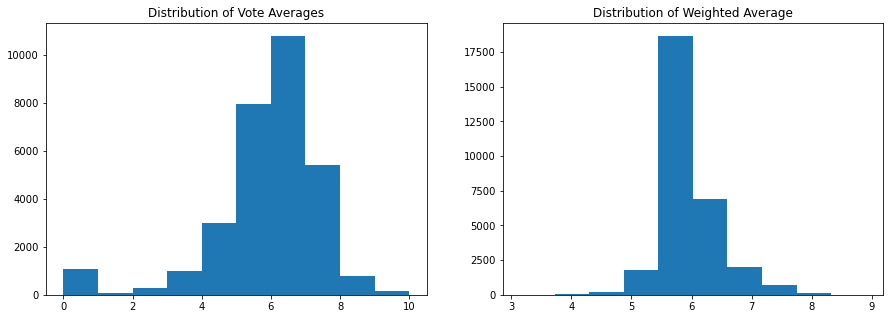

In [43]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
ax[0].hist(df_movies["vote_average"])
ax[0].set_title("Distribution of Vote Averages")

ax[1].hist(df_movies["weighted_average"])
ax[1].set_title("Distribution of Weighted Average")
plt.show()

## Feature Engineering

In [44]:
X_train=df_movies.copy()

In [45]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
X_train_clean = X_train.copy()

numerical_list = ['revenue', 'popularity','budget', 'runtime', 'vote_count', "weighted_average", "vote_average", "director_movie_count", "cast_movie_count"]


Total number of movies in each genre.

In [46]:
for genre in genre_list:
  print(genre, X_train_clean[(X_train_clean[genre] == True)].shape)

Adventure (2900, 39)
Science Fiction (2372, 39)
Fantasy (1815, 39)
Crime (3518, 39)
Western (877, 39)
Family (2061, 39)
Animation (1352, 39)
War (1094, 39)
Mystery (1995, 39)
Romance (5182, 39)
TV Movie (479, 39)
Action (5170, 39)
Thriller (5912, 39)
Comedy (9506, 39)
Drama (15138, 39)
History (1073, 39)
Music (1111, 39)
Horror (3547, 39)
Documentary (1328, 39)
Foreign (732, 39)


Categorizing budget on the basis of low, medium and high category.

In [47]:
def categorize_budget(budget):
  if budget < 2.909267e+07:
    return 'Low'
  elif 2.909267e+07 <= budget <= 42268587.8827761	:
    return 'Medium'
  else:
    return 'High'


X_train_clean['Budget Category'] = X_train_clean['budget'].astype(int).apply(categorize_budget)

duration_groups = X_train_clean.groupby(by = 'Budget Category')

value_dict = {}
for key, vals in duration_groups.groups.items():
  value_dict[key] = X_train_clean.loc[vals]['vote_average'].dropna().values

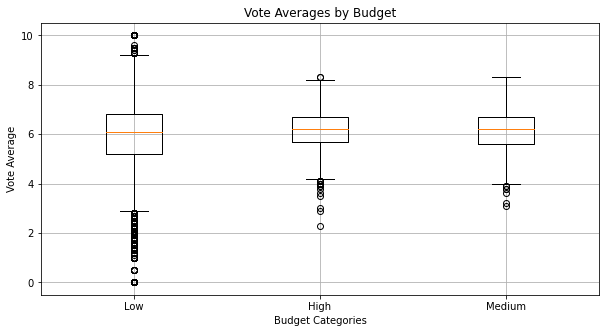

In [48]:
ratings = sorted(value_dict.items(), key=lambda x: np.median(x[1]))
fig, ax = plt.subplots(figsize=(10,5))

ax.boxplot([val[1] for val in ratings])
ax.set_xticklabels([rating[0] for rating in ratings])
ax.set_ylabel('Vote Average')
ax.set_xlabel('Budget Categories')
ax.set_title('Vote Averages by Budget')
ax.grid()
plt.show();

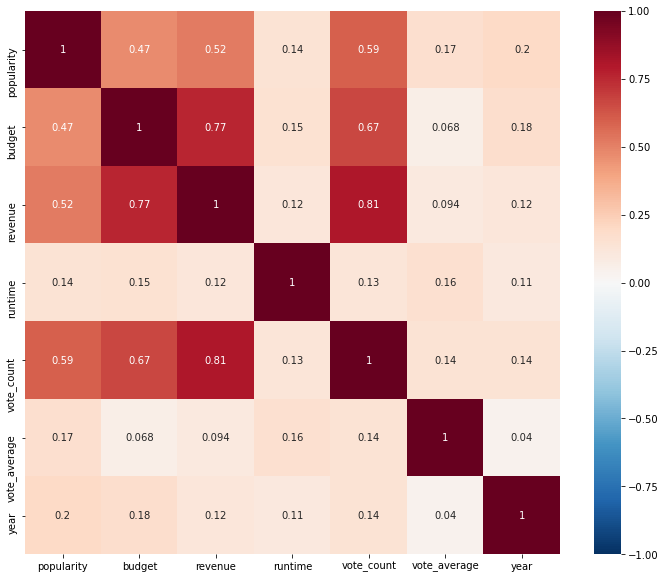

In [49]:
plt.figure(figsize = (12,10))
corr = df_movies[['popularity','budget','revenue','runtime','vote_count','vote_average','year']].corr()
sns.heatmap(corr, vmin = -1.0, vmax = 1.0, center = 0, cmap = 'RdBu_r', annot = True, data = df_movies)
plt.show()

There is a strong correlation betweeen:

- vote_count and popularity and revenue
- revenue and budget 

The correlation between budget and popularity is not as strong as the correlation between revenue and budget. This relations gives us clues about the differences between movies.

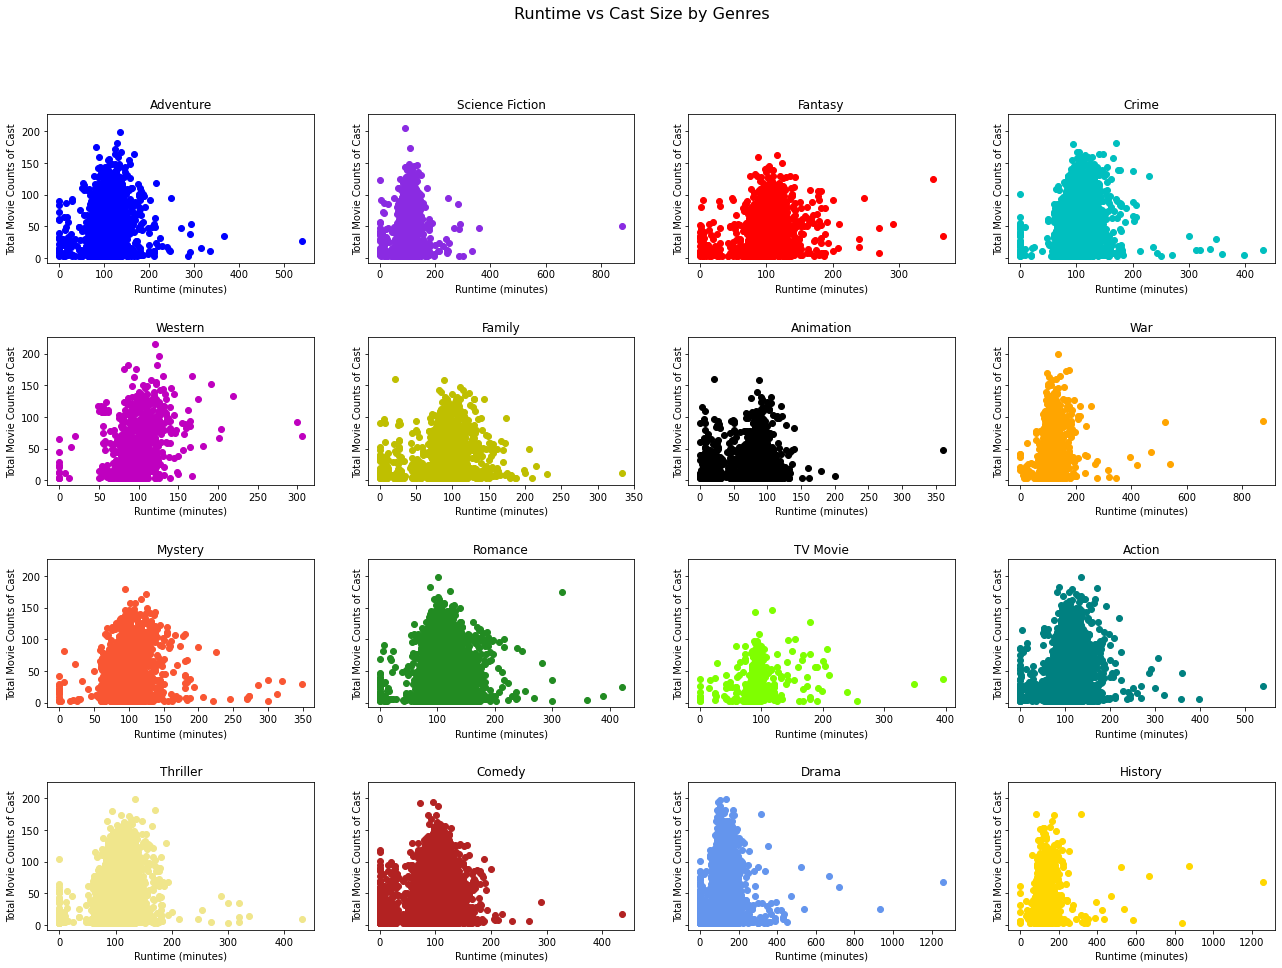

In [51]:
#Runtime vs Cast Size by Genres
fig, ax = plt.subplots(4,4, figsize = (22,15), sharey = True)
fig.suptitle('Runtime vs Cast Size by Genres', fontsize=16)
plt.subplots_adjust(hspace=0.5)

color_list = ["b", "blueviolet", "r", "c", "m", "y", "k", "orange",
              "#F95633","forestgreen","chartreuse","teal","khaki","firebrick","cornflowerblue","gold"]
i = 0
j = 0
k = 0

for i in range(4):
  for j in range(4):
    temp_df = X_train_clean[X_train_clean[genre_list[k]] == True]
    ax[i][j].plot(temp_df["runtime"], temp_df["cast_movie_count"],
                  marker='.', linestyle='', ms=12, label=genre, c=color_list[(k) % 16])
    ax[i][j].set_title(genre_list[k])
    ax[i][j].set_xlabel("Runtime (minutes)")
    ax[i][j].set_ylabel("Total Movie Counts of Cast")
    k+=1

The above visualization shows that most of the genres are clustered.

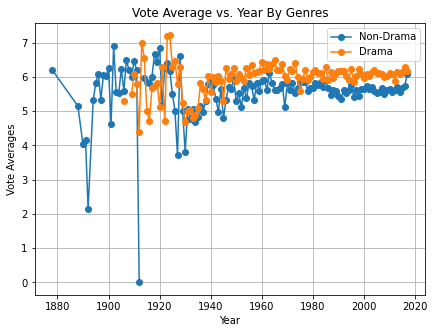

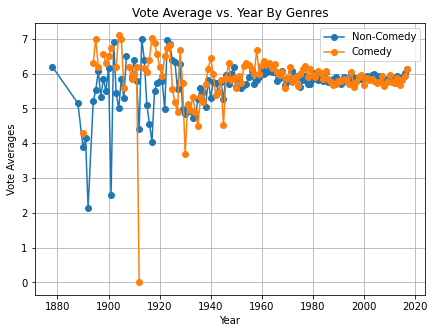

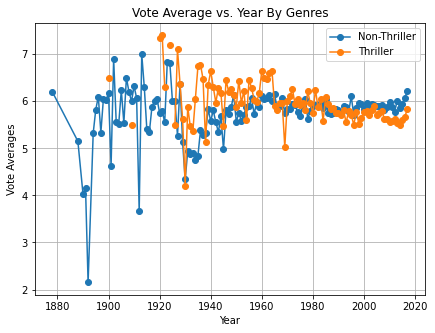

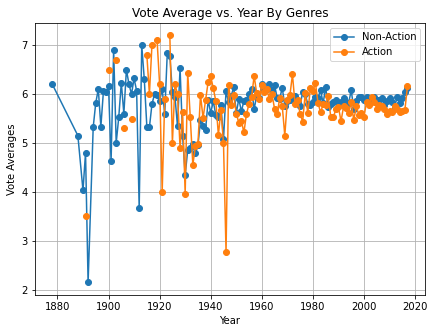

In [52]:
mini_genre_list = [["Drama", "Comedy"], ["Thriller", "Action"]]
for a in range(2):
  for b in range(2):
    groups = X_train_clean.groupby(by = ["year",mini_genre_list[a][b]])
    ax[a][b] = groups["vote_average"].mean().unstack().plot(figsize = (7, 5), grid = True,
                                                  xlabel="Year", ylabel = "Vote Averages",
                                                  marker = "o",
                                                  title = "Vote Average vs. Year By Genres")
    ax[a][b].legend(["Non-"+mini_genre_list[a][b],mini_genre_list[a][b]])
plt.show()

Here we can see some genres vote averages through years. Some genres got lower ratings compared to others in some years. For example, drama movies were rated high after 2000.

### Director Movie Count vs Vote Average by Genre

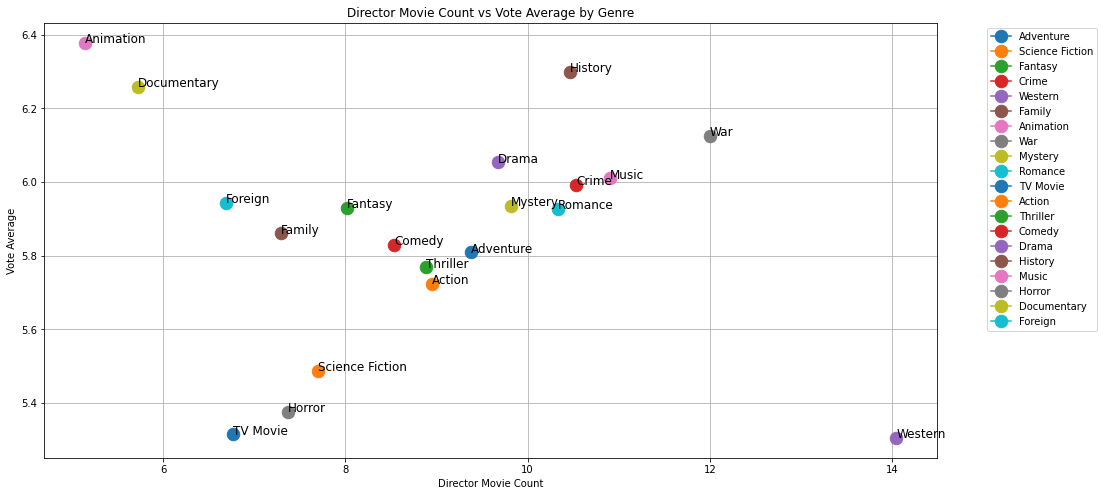

In [53]:
fig, ax = plt.subplots(1, 1, figsize = (16,8))
for genre in genre_list:
    temp_df = X_train_clean[X_train_clean[genre] == True]
    genre_group = temp_df.groupby(genre)[["director_movie_count", "vote_average"]].mean()
    genre_group.plot(x="director_movie_count", y="vote_average", kind="line", ax=ax, marker='.', ms=25, label=genre)
    ax.annotate(genre, (genre_group.director_movie_count, genre_group.vote_average), xycoords = "data", fontsize = 12)

ax.set_title("Director Movie Count vs Vote Average by Genre")
ax.set_xlabel("Director Movie Count")
ax.set_ylabel("Vote Average")

ax.grid(True)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The scatter graph shows that genres are very important to identify the relationships between movies, especially for foreign, animation, documentary and tv movies. Vote averages and director movie counts are also informative, because different genres have different types of directors.

## Machine Learning Models
We implement a K-Means Clustering model, an Agglomerative Clustering model, a K-Means model with Principal Component Analysis in order to find movies that are alike. We aim to discover how we can find movies related with their numerical and binary attributes. These attributes include budget, revenue, runtime, vote counts, weighted average, vote average, year and genres.

## K-Means clustering

In [55]:
X_train_num= X_train.drop(["genres","title","director","cast_1","cast_2","cast_3","production_companies_1"], axis = 1)
X_train_num = X_train_num.drop(genre_list, axis=1)

Here, we use StandardScaler to scale our data.

In [56]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_num_wout_id = scaler.fit_transform(X_train_num.drop(columns=["id"]))
X_train_num_wout_id = pd.DataFrame(X_train_num_wout_id, 
                                   columns = X_train_num.drop(columns=["id"]).columns, index = X_train_num.index)

In [57]:
kmeanModel = KMeans(n_clusters=30)
kmeanModel.fit(X_train_num_wout_id)
cluster_type = "KMeans_Cluster"
X_train_num = X_train_num_wout_id.join(X_train_num["id"])               
X_train_num[cluster_type] = kmeanModel.labels_
X_train_num[cluster_type].sample(n=10)

e = []
def fi(group):
    a = pd.DataFrame(group)
    b = pd.DataFrame(a[cluster_type].value_counts())
    d = a.index 
    c = [a['id'][d[0]],int(b.idxmax())]
    e.append(c)

X_train_num.groupby("id").apply(lambda x: fi(x))

e = pd.DataFrame(e)
e.rename(columns = {0:'id',1:cluster_type},inplace=True)
e.drop_duplicates(inplace=True)

new_data = pd.merge(e , X_train , how='outer', on='id')

In [58]:
from sklearn.metrics import silhouette_score
label=kmeanModel.predict(X_train_num_wout_id)
print(f'Silhouette Score(n=30): {silhouette_score(X_train_num_wout_id, label)}')

Silhouette Score(n=30): 0.1458136068913079


Sihouette score for K-Means clustering is 0.14 which is not good.

## Cluster Visualization

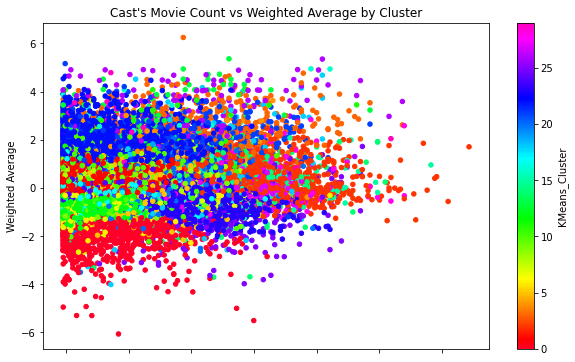

In [59]:
X_train_num.plot.scatter('cast_movie_count', 'weighted_average', c=cluster_type, colormap='gist_rainbow',
                         title="Cast's Movie Count vs Weighted Average by Cluster", figsize=(10,6)).set(xlabel="Cast's Movie Count", ylabel="Weighted Average");

Since our data is high dimensional, it is hard to seperate the clusters by just two features.

This function gets a movie name and finds its cluster. We also have some input check processes in case there are multiple movies with the same name, or if the movie name was not in our dataset.

In [60]:
import random

def select_c(cluster_type):
    global movie_title_c
    global movie_title_year_c
    global movie_title
    global movie_year
    global isDuplicate
    isDuplicate=False
    movie_title = input('Please enter the title of the movie you want recommendations for:')
    if new_data[new_data["title"]==movie_title].value_counts().sum() ==1 :
      movie_title_c = new_data[cluster_type][new_data.title == movie_title]
    else:
      while new_data[new_data["title"]==movie_title].value_counts().sum() ==0 or new_data[new_data["title"]==movie_title].value_counts().sum()>1:
        if new_data[new_data["title"]==movie_title].value_counts().sum() >1 :
          print('There are multiple movies with the same name.')
          mymovie = new_data[new_data["title"]==movie_title]
          for movie in mymovie.index:
            print(movie_title, " (", mymovie.loc[movie].year,") dir. ", mymovie.loc[movie].director, sep="")
          movie_year = input('Please enter the year of the movie:')
          movie_title_year_c= new_data[cluster_type][(new_data.year == int(movie_year))&
                                                  (new_data.title == movie_title)]
          isDuplicate=True
          break
        elif new_data[new_data["title"]==movie_title].value_counts().sum() ==0 :
          print('This movie does not exist in our database!')
          movie_title = input('Please enter the title of the movie you want recommendations for:')
      movie_title_c = new_data[cluster_type][new_data.title == movie_title]   

This function prints 5 movies that are in the same cluster with the chosen movie.

In [62]:
def main(cluster_type):
    ans = False
    a = 5
    while not ans:
        select_c(cluster_type)
        if isDuplicate:
          print(new_data['title'][new_data[cluster_type] == int(movie_title_year_c)].sample(n=a))
        else:
          print(new_data['title'][new_data[cluster_type] == int(movie_title_c)].sample(n=a))
        print('--------------------------------------------------------------------')
        print('Do you like these movies(y/n)')
        abc = input()
        while ((abc =='y') or (abc == 'Y')):
          if isDuplicate:
            print(new_data['title'][new_data[cluster_type] == int(movie_title_year_c)].sample(n=a))
          else:          
            print(new_data['title'][new_data[cluster_type] == int(movie_title_c)].sample(n=a))
          print('--------------------------------------------------------------------')
          print('Want more!!!!(y/n)')
          abc = input()
          if ((abc =='N') or (abc == 'n')):
              ans =True

### Movie Recommendations using KMeans model.

In [63]:
main(cluster_type)

Please enter the title of the movie you want recommendations for:Avatar
7267                         Big Hero 6
26039                      Pulp Fiction
9483                          Gone Girl
13718    Guardians of the Galaxy Vol. 2
15890              Beauty and the Beast
Name: title, dtype: object
--------------------------------------------------------------------
Do you like these movies(y/n)
y
7267                                Big Hero 6
3634     The Hunger Games: Mockingjay - Part 1
12921               Captain America: Civil War
13718           Guardians of the Galaxy Vol. 2
13561           War for the Planet of the Apes
Name: title, dtype: object
--------------------------------------------------------------------
Want more!!!!(y/n)
n


These recommendations do not seem very accurate. Avatar is a Action/Adventure movie, whereas our model recommended a Mystery movie (Gone Girl).

## Agglomerative Model

In [65]:
X_train_num= X_train.drop(["genres", "title","director","cast_1","cast_2","cast_3","production_companies_1"], axis = 1)

scaler = StandardScaler()

X_train_num_wout_id = scaler.fit_transform(X_train_num.drop(columns=["id"]))
X_train_num_wout_id = pd.DataFrame(X_train_num, 
                                   columns = X_train_num.drop(columns=["id"]).columns, index = X_train_num.index)

In [66]:
import gower
from sklearn.cluster import AgglomerativeClustering

In [67]:
distanceMatrix = gower.gower_matrix(X_train_num_wout_id)

agglomerative_with_gower_model = AgglomerativeClustering(n_clusters = 30, affinity= 'precomputed', linkage= 'complete')

agglomerative_with_gower_model.fit(distanceMatrix)
label = agglomerative_with_gower_model.labels_

In [68]:
sscore = silhouette_score(distanceMatrix, label, metric='precomputed')
print(f'Silhouette Score(n=30): {sscore}')

Silhouette Score(n=30): 0.1488572359085083


The silhouette score for Agglomerative clustering is 0.148 which has increased an insignificant amount.

In [69]:
cluster_type = "Gower_Clustering"

X_train_num = X_train_num_wout_id.join(X_train_num["id"])               
X_train_num[cluster_type] = agglomerative_with_gower_model.labels_
X_train_num[cluster_type].sample(n=10)

e = []
def fi(group):
    a = pd.DataFrame(group)
    b = pd.DataFrame(a[cluster_type].value_counts())
    d = a.index 
    c = [a['id'][d[0]],int(b.idxmax())]
    e.append(c)

X_train_num.groupby("id").apply(lambda x: fi(x))

e = pd.DataFrame(e)
e.rename(columns = {0:'id',1:cluster_type},inplace=True)
e.drop_duplicates(inplace=True)

new_data = pd.merge(e , X_train , how='outer', on='id')

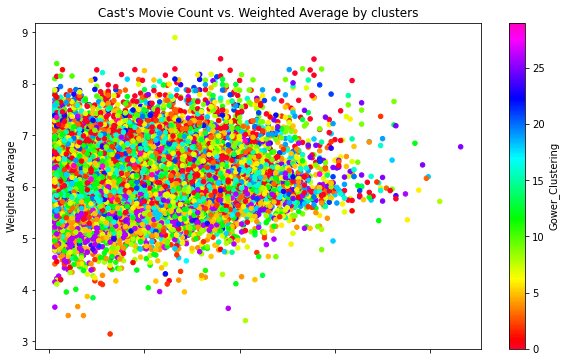

In [70]:
X_train_num.plot.scatter('cast_movie_count', 'weighted_average', c=cluster_type, colormap='gist_rainbow', figsize=(10,6),
                         title="Cast's Movie Count vs. Weighted Average by clusters").set(xlabel="Cast's Movie Count",
                        ylabel="Weighted Average");

Now, attempts to visualize suffer even more from high dimensionality. The clusters are not seperable by two features

In [73]:
main(cluster_type)

Please enter the title of the movie you want recommendations for:Avatar
4883            Superman Returns
2386     Guardians of the Galaxy
7315          Kull the Conqueror
8782                      Avatar
24982     The Matrix Revolutions
Name: title, dtype: object
--------------------------------------------------------------------
Do you like these movies(y/n)
y
26817              War of the Worlds
5197     G.I. Joe: The Rise of Cobra
19337            Godzilla vs. Mothra
5963                    Tomorrowland
13721                 Doctor Strange
Name: title, dtype: object
--------------------------------------------------------------------
Want more!!!!(y/n)
n


The recommendations are much better! Most of the movies are Action / Adventure movies.

## KMeans Model with Principal Component Analysis
We believe that previous models suffered a lot from the high dimensionality of our data. Therefore we are going to do a principal component analysis in order to overcome this problem.

In [74]:
X_train_num= X_train.drop(["genres","title","director","cast_1","cast_2","cast_3","production_companies_1"], axis = 1)

scaler = StandardScaler()

X_train_num_wout_id = scaler.fit_transform(X_train_num.drop(columns=["id"]))
X_train_num_wout_id = pd.DataFrame(X_train_num_wout_id, 
                                   columns = X_train_num.drop(columns=["id"]).columns, index = X_train_num.index)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train_num_wout_id)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [75]:
kmeanModel = KMeans(n_clusters=30)
kmeanModel.fit(principalDf)
cluster_type = "KMeans_Cluster"

cluster_type = "PCA_Cluster"
X_train_num = X_train_num_wout_id.join(X_train_num["id"])               
X_train_num[cluster_type] = kmeanModel.labels_

e = []
def fi(group):
    a = pd.DataFrame(group)
    b = pd.DataFrame(a[cluster_type].value_counts())
    d = a.index 
    c = [a['id'][d[0]],int(b.idxmax())]
    e.append(c)

X_train_num.groupby("id").apply(lambda x: fi(x))

e = pd.DataFrame(e)
e.rename(columns = {0:'id',1:cluster_type},inplace=True)
e.drop_duplicates(inplace=True)

new_data = pd.merge(e , X_train , how='outer', on='id')

In [76]:
label=kmeanModel.predict(principalDf)
print(f'Silhouette Score(n=30): {silhouette_score(principalDf, label)}')

Silhouette Score(n=30): 0.32198045096744804


The silhouette score has significantly increased after applying PCA to our dataset.

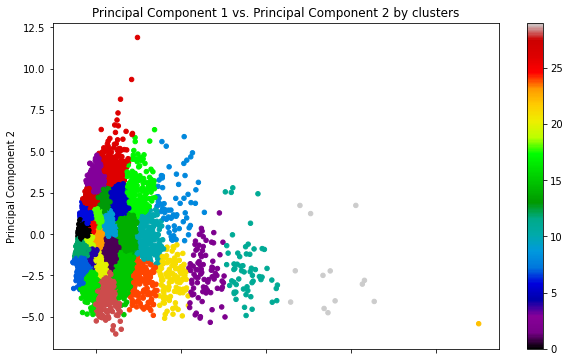

In [77]:
principalDf.plot.scatter('principal component 1', 'principal component 2', c=label, colormap='nipy_spectral', figsize=(10, 6),
                         title="Principal Component 1 vs. Principal Component 2 by clusters").set(xlabel="Principal Component 1",
                        ylabel="Principal Component 2")
plt.show();

The clusters are much clearer when compared to previous models. Applying PCA, we reduced the dimensionality of the data. Therefore we can see the clusters clearly and have higher silhouette score.

In [83]:
main(cluster_type)

Please enter the title of the movie you want recommendations for:Superman Returns
17231     The Simpsons Movie
2776        Assassin's Creed
24292              The Mummy
3027                Godzilla
8003     Clash of the Titans
Name: title, dtype: object
--------------------------------------------------------------------
Do you like these movies(y/n)
y
16135    Percy Jackson & the Olympians: The Lightning T...
26124                                             Warcraft
29859                  Prince of Persia: The Sands of Time
27117                                        The Wolverine
24982                               The Matrix Revolutions
Name: title, dtype: object
--------------------------------------------------------------------
Want more!!!!(y/n)
n


## Results
K-Means model used only numerical features and Agglomerative model, including genres as features improved the performance of our models when recommending movies. On the other hand, this did not result in an increase in silhouette score of the models.

The improvements in the silhouette score and visualization using K-Means model with PCA are significant. Thus K-Means model with PCA is better than Agglomerative model.


## Recommendations
The importances of the machine learning models could be modify to enhance the performance. Also, the performance of the movie recommendation system can be visualized using advanced techniques.